# Potential Field: NOAA 1158
Produce a potential field for use in the friction code for producing force-free magnetic fields.

In [7]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import synthesizAR
import yt

%matplotlib inline

In [8]:
field = synthesizAR.Skeleton.restore('/storage-home/w/wtb2/data/base_noaa1158/')

No HMI fits file supplied. A new HMI map object will not be created.
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev493-py3.6.egg/synthesizAR/field.py:187: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  lcx, rcx = self.hmi_map.xrange + self.hmi_map.scale.axis1*u.Quantity([boundary_clipping[0], -boundary_clipping[0]], u.pixel)
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev493-py3.6.egg/synthesizAR/field.py:188: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  lcy, rcy = self.hmi_map.yrange + self.hmi_map.scale.axis2*u.Quantity([boundary_clipping[1], -boundary_clipping[1]], u.pixel)
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev493-py3.6.egg/synthesizAR/field.py:195: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  bbox = np.array([self._convert_angle_to_length(self

In [14]:
field._map_3d.shape

(100, 99, 100, 3)

First, do a quick visualization of the extrapolated field itself. This will serve as a check for later cases.

yt : [INFO     ] 2017-11-21 16:25:56,554 Projection completed
yt : [INFO     ] 2017-11-21 16:25:56,555 xlim = -29793120078.254406 -11846331526.051441
yt : [INFO     ] 2017-11-21 16:25:56,556 ylim = -26209138438.247005 -7412702104.521481
yt : [INFO     ] 2017-11-21 16:25:56,557 xlim = -29793120078.254406 -11846331526.051441
yt : [INFO     ] 2017-11-21 16:25:56,558 ylim = -26209138438.247005 -7412702104.521481
yt : [INFO     ] 2017-11-21 16:25:56,559 Making a fixed resolution buffer of (('stream', 'Bx')) 800 by 800
yt : [INFO     ] 2017-11-21 16:25:56,568 Making a fixed resolution buffer of (('stream', 'By')) 800 by 800
yt : [INFO     ] 2017-11-21 16:25:56,579 Making a fixed resolution buffer of (('stream', 'Bz')) 800 by 800
yt : [WARNING  ] 2017-11-21 16:25:56,600 Plot image for field ('stream', 'Bx') has both positive and negative values. Min = -44738604.649766, Max = 26088912.193379.
yt : [WARNING  ] 2017-11-21 16:25:56,601 Switching to symlog colorbar scaling unless linear scaling is

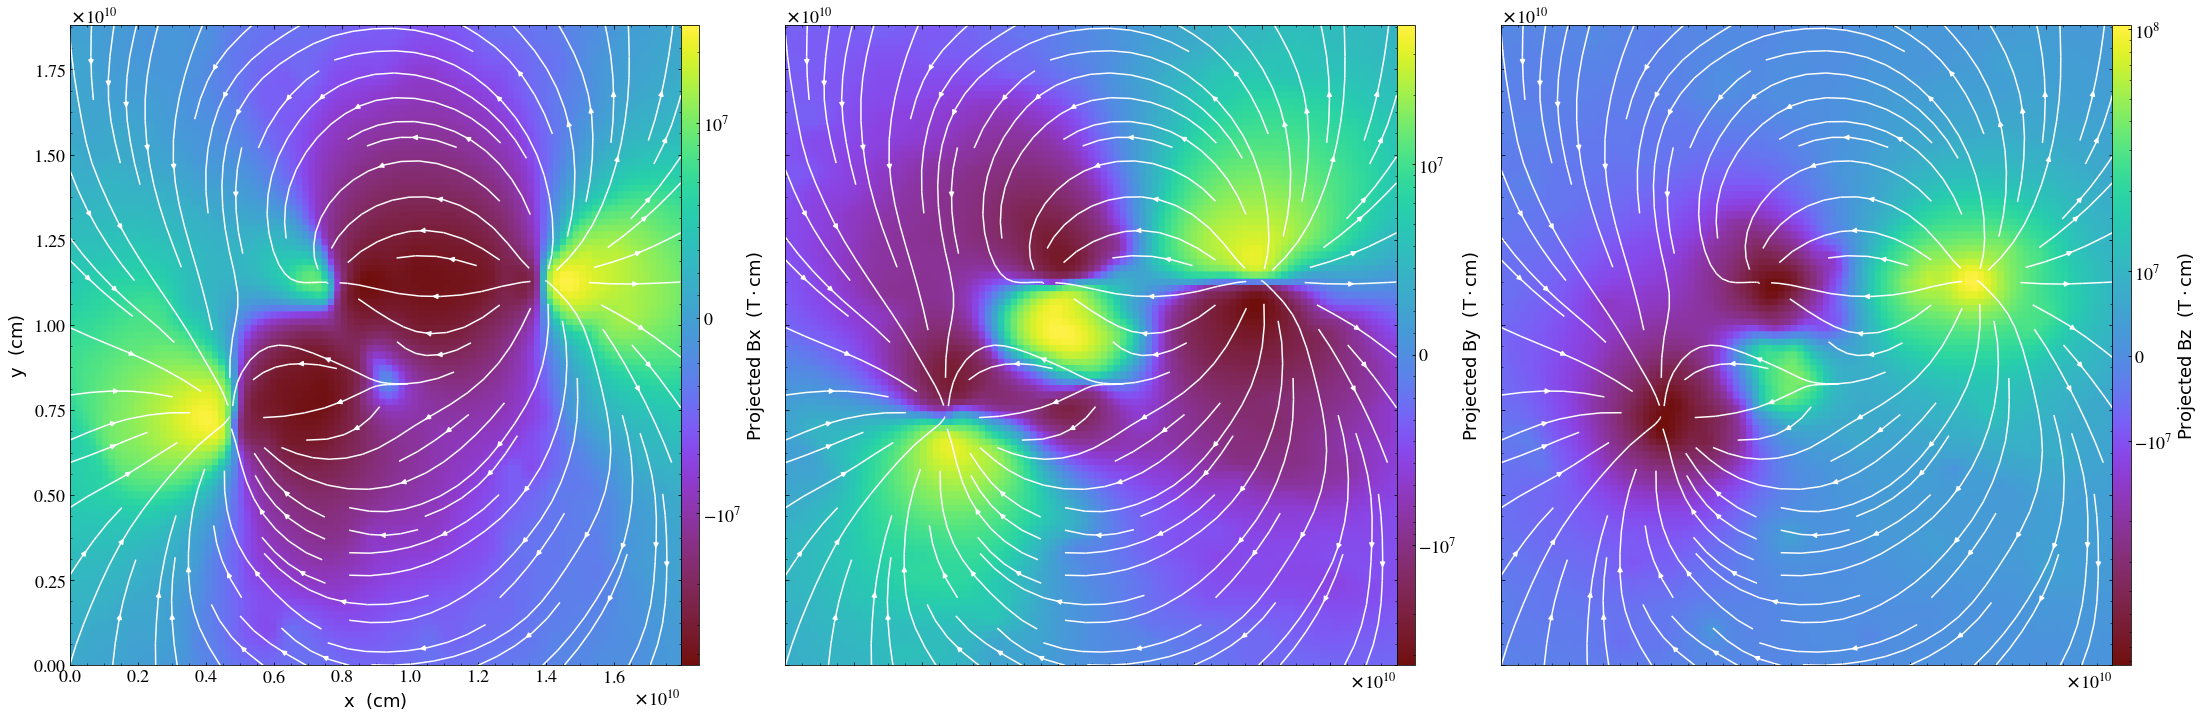

In [12]:
mag_fields = ['Bx','By','Bz']
fig = plt.figure()
grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                nrows_ncols = (1, 3),
                axes_pad = 1.2,
                label_mode = "1",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="3%",
                cbar_pad="0%")
fig.set_figwidth(20)
p = yt.ProjectionPlot(field.extrapolated_3d_field,'z',mag_fields,origin='domain',axes_unit='cm')
p.annotate_streamlines('Bx','By',density=1,plot_args={'color':'w'})
p.figure_size = 30
for i,b_field in enumerate(mag_fields):
    plot = p.plots[b_field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]
p._setup_plots()

Now, export the data to plaintext files easily readable by the friction code.

In [ ]:
index_b_mapping = [(1,'bx'),(0,'by'),(2,'bz')]
fn_format = '/home/wtb2/Desktop/hmi_noaa1109_potential_field.{}'
for ibm in index_b_mapping:
    with open(fn_format.format(ibm[1]),'wb') as f:
        f.write(str.encode('// ny,nx,nz={}\n'.format(field_hmi._map_3d.data[:,:,:,ibm[0]].shape)))
        for i in range(field_hmi._map_3d.data[:,:,:,ibm[0]].shape[-1]):
            np.savetxt(f,field_hmi._map_3d.data[:,:,i,ibm[0]])
            f.write(b'////////////\n')